In [1]:
import pandas as pd
import frust.vis as vis
from frust.utils.analytics import summarize_ts_vibrations, build_annotated_frame

In [2]:
conversion_factor       =  627.509474
dimer_dft               = -834847.294
HBpin_dft               = -258305.91711374212
H2_dft                  = -737.1088023791428

dimer_xtb               = -97.050557670754 * conversion_factor
HBpin_xtb               = -28.947535986441 * conversion_factor
H2_xtb                  = -0.9826859256890 * conversion_factor

In [3]:
df_int3 = pd.read_parquet("output_files/10_int3_TMP.parquet")

In [4]:
summarize_ts_vibrations(df_int3, "DFT-wB97X-D3-6-31G**-Freq-vibs")
vis.plot_row(df_int3, coord_indices=[3,4])

 Structure          Ligand  RPOS           Status     Neg. freqs             Pos. freqs
         0 1-benzylpyrrole     3 ❌ Not TS (0 neg) No negatives | 15.0, 20.0, 33.6 ... |
         1 1-benzylpyrrole     4 ❌ Not TS (0 neg) No negatives | 11.8, 18.0, 29.0 ... |
         2 1-benzylpyrrole     5        ✅ True TS        -1.80 | 20.7, 28.0, 35.6 ... |
         3 1-benzylpyrrole     8 ❌ Not TS (0 neg) No negatives | 11.7, 18.8, 21.4 ... |
         4 1-benzylpyrrole     9 ❌ Not TS (0 neg) No negatives | 17.6, 22.3, 27.6 ... |

... and 25 more rows.

Summary:
  ✅ True TSs : 1
  ❌ Non-TSs  : 29
Found 2 coordinate columns: ['DFT-pre-Opt-wB97X-D3-6-31G**-Freq-opt_coords', 'DFT-wB97X-D3-6-31G**-Freq-opt_coords']
Processing 1 rows
Generated 2 molecules for display


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

In [5]:
df_int3_slice = df_int3[["ligand_name", "rpos", "xtb-gfn-opt-electronic_energy", "DFT-wB97X-D3-6-31G**-Freq-electronic_energy", "DFT-wB97X-D3-6-31G**-Freq-gibbs_energy", "DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"]]

In [6]:
G_corr = df_int3_slice["DFT-wB97X-D3-6-31G**-Freq-gibbs_energy"] - df_int3_slice["DFT-wB97X-D3-6-31G**-Freq-electronic_energy"]
df_int3_slice["G"] = (df_int3_slice["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + G_corr) * conversion_factor
df_int3_slice

/var/folders/w8/dw2s8m6d08n_zk2vl0dzb53h0000gn/T/ipykernel_24184/2167400833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_int3_slice["G"] = (df_int3_slice["DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + G_corr) * conversion_factor


,ligand_name,rpos,xtb-gfn-opt-electronic_energy,DFT-wB97X-D3-6-31G**-Freq-electronic_energy,DFT-wB97X-D3-6-31G**-Freq-gibbs_energy,DFT-SP-wB97X-D3-6-31+G**-NoSym-electronic_energy,G
0,1-benzylpyrrole,3,-108.520264,-1556.524669,-1555.845547,-1556.592421,-9.763503e+05
1,1-benzylpyrrole,4,-108.520278,-1556.537143,-1555.861802,-1556.606488,-9.763615e+05
2,1-benzylpyrrole,5,-108.519294,-1556.516880,-1555.837298,-1556.587467,-9.763469e+05
3,1-benzylpyrrole,8,-108.534424,-1556.542664,-1555.863823,-1556.609473,-9.763612e+05
4,1-benzylpyrrole,9,-108.529081,-1556.535722,-1555.856244,-1556.608617,-9.763603e+05
5,1-methylindole,4,-103.241182,-1479.139578,-1478.494008,-1479.203475,-9.278091e+05
6,1-methylindole,5,-103.239376,-1479.138959,-1478.493503,-1479.204081,-9.278095e+05
7,1-methylindole,6,-103.240731,-1479.139410,-1478.493727,-1479.204108,-9.278094e+05
8,1-methylindole,7,-103.241044,-1479.137383,-1478.491084,-1479.197214,-9.278047e+05
9,1-methylindole,8,-103.249976,-1479.154661,-1478.508806,-1479.220608,-9.278197e+05


In [7]:
df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
)

df_lig.drop(columns="orca-wB97X-D3-6-31G**-Freq-vibs")

,custom_name,ligand_name,rpos,constraint_atoms,cid,smiles,atoms,coords_embedded,energy_uff,xtb-gfnff-opt-electronic_energy,...,xtb-gfn-normal_termination,xtb-gfn-opt-electronic_energy,xtb-gfn-opt-normal_termination,xtb-gfn-opt-opt_coords,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31G**-Freq-normal_termination,orca-wB97X-D3-6-31G**-Freq-opt_coords,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,orca-wB97X-D3-6-31+G**-NoSym-normal_termination
0,CN1C=CC=C1_1-methylpyrrole,1-methylpyrrole,None,None,5,None,"[C, N, C, C, C, C, H, H, H, H, H, H, H]","[[1.901870289570235, 0.06566438926249234, 0.00...",None,-2.418193,...,True,-17.188310,True,"[[1.86162046085733, 0.05712764761933, 0.023047...",-249.415200,-249.332065,True,"[[1.871103, 0.057473, 0.015262], [0.426034, 0....",-249.436114,True
1,"C12=CSC=C1OCCO2_2,3-dihydrothieno[3,4-b][1,4]d...","2,3-dihydrothieno[3,4-b][1,4]dioxine",None,None,21,None,"[C, C, S, C, C, O, C, C, O, H, H, H, H, H, H]","[[0.6698110489179192, 0.6368450733788671, 0.24...",None,-2.614358,...,True,-27.271791,True,"[[0.60981376630919, 0.70289956852261, 0.237274...",-780.723557,-780.640884,True,"[[0.615363, 0.705071, 0.244766], [1.84382, 1.2...",-780.747995,True
2,C[Si](C)(OC1=CC=CO1)C_furan-2-yloxy(trimethyl)...,furan-2-yloxy(trimethyl)silane,None,None,22,None,"[C, Si, C, O, C, C, C, C, O, C, H, H, H, H, H,...","[[-0.7840774279768576, -0.13952974087861436, 1...",None,-3.585101,...,True,-30.996491,True,"[[-0.88218387438664, 0.34826535983198, 2.06614...",-713.839262,-713.698698,True,"[[-0.842518, 0.376868, 2.007009], [-1.188296, ...",-713.860134,True
3,C[Si](N1C=CC=C1)(C)C_trimethyl(pyrrol-1-yl)silane,trimethyl(pyrrol-1-yl)silane,None,None,9,None,"[C, Si, N, C, C, C, C, C, C, H, H, H, H, H, H,...","[[-1.9254451732295033, -0.6655141486958103, -1...",None,-3.661086,...,True,-26.269264,True,"[[-1.83314476629126, -0.73097762739336, -1.287...",-618.773168,-618.622349,True,"[[-1.835564, -0.688707, -1.273722], [-0.920335...",-618.797128,True
4,CC(C1=CC=CO1)(C)C_2-tert-butylfuran,2-tert-butylfuran,None,None,7,None,"[C, C, C, C, C, C, O, C, C, H, H, H, H, H, H, ...","[[-0.7705814104760014, 0.8009883887328766, -1....",None,-3.543296,...,True,-27.314917,True,"[[-0.85428764843631, 0.87604914062269, -1.4808...",-387.198040,-387.046391,True,"[[-0.858571, 0.867789, -1.485761], [-0.776737,...",-387.217271,True
5,CC([Si](N1C=CC=C1)(C(C)C)C(C)C)C_tri(propan-2-...,tri(propan-2-yl)-pyrrol-1-ylsilane,None,None,79,None,"[C, C, Si, N, C, C, C, C, C, C, C, C, C, C, C,...","[[-1.6469087827335982, -0.7048999269573131, 2....",None,-6.327760,...,True,-45.248024,True,"[[-1.97225758529225, -0.18537986560273, 2.1513...",-854.599638,-854.283616,True,"[[-1.986602, -0.156936, 2.121306], [-1.804573,...",-854.629311,True
6,COC1=CC=CO1_2-methoxyfuran,2-methoxyfuran,None,None,34,None,"[C, O, C, C, C, C, O, H, H, H, H, H, H]","[[2.409145115377121, 0.19594811217862987, -0.1...",None,-2.325961,...,True,-21.878741,True,"[[2.29918004653874, 0.26830206733918, -0.07973...",-344.451908,-344.377185,True,"[[2.297333, 0.280013, -0.079896], [1.356452, -...",-344.470382,True
7,CC1=CC=CO1_2-methylfuran,2-methylfuran,None,None,41,None,"[C, C, C, C, C, O, H, H, H, H, H, H]","[[-1.8873104967913783, 0.21972371261492993, 0....",None,-2.201913,...,True,-17.816401,True,"[[-1.89557651838898, 0.23910941433334, 0.05149...",-269.273972,-269.203328,True,"[[-1.895605, 0.248725, 0.05427], [-0.420468, 0...",-269.290542,True
8,C1=CC=CO1_furan,furan,None,None,32,None,"[C, C, C, C, O, H, H, H, H]","[[0.888690999246738, -0.7499341898567017, 0.19...",None,-1.729147,...,True,-14.645031,True,"[[0.91563746358105, -0.69167828638148, 0.21945...",-229.958568,-229.913564,True,"[[0.923803, -0.684889, 0.225206], [0.648855, 0...",-229.973386,True
9,N1(CC2=CC=CC=C2)C=CC=C1_1-benzylpyrrole,1-benzylpyrrole,None,None,0,None,"[N, C, C, C, C, C, C, C, C, C, C, C, H, H, H, ...","[[-1.521993920397026, -0.505700046474715, -0.2...",None,-4.607636,...,

In [8]:
df_lig = pd.read_parquet(
    "output_files/font_ligs.parquet",
    columns=[
        "ligand_name",
        "xtb-gfn-opt-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-electronic_energy",
        "orca-wB97X-D3-6-31G**-Freq-gibbs_energy",
        "orca-wB97X-D3-6-31+G**-NoSym-electronic_energy",
    ],
)
G_corr = df_lig["orca-wB97X-D3-6-31G**-Freq-gibbs_energy"] - df_lig["orca-wB97X-D3-6-31G**-Freq-electronic_energy"]
df_lig["G"] = (df_lig["orca-wB97X-D3-6-31+G**-NoSym-electronic_energy"] + G_corr) * conversion_factor
df_lig

,ligand_name,xtb-gfn-opt-electronic_energy,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,G
0,1-methylpyrrole,-17.188310,-249.415200,-249.332065,-249.436114,-156471.356733
1,"2,3-dihydrothieno[3,4-b][1,4]dioxine",-27.271791,-780.723557,-780.640884,-780.747995,-489874.885981
2,furan-2-yloxy(trimethyl)silane,-30.996491,-713.839262,-713.698698,-713.860134,-447865.791607
3,trimethyl(pyrrol-1-yl)silane,-26.269264,-618.773168,-618.622349,-618.797128,-388206.419807
4,2-tert-butylfuran,-27.314917,-387.198040,-387.046391,-387.217271,-242887.344895
5,tri(propan-2-yl)-pyrrol-1-ylsilane,-45.248024,-854.599638,-854.283616,-854.629311,-536089.682474
6,2-methoxyfuran,-21.878741,-344.451908,-344.377185,-344.470382,-216111.538758
7,2-methylfuran,-17.816401,-269.273972,-269.203328,-269.290542,-168938.036684
8,furan,-14.645031,-229.958568,-229.913564,-229.973386,-144282.238002
9,1-benzylpyrrole,-32.068578,-480.406346,-480.245737,-480.442777,-301381.610515


In [9]:
df_merged = pd.merge(df_int3_slice, df_lig, on=["ligand_name"], how="inner", suffixes=["_int3", "_lig"])
df_merged = df_merged[["ligand_name", "rpos", "G_int3", "G_lig"]]
df_merged

,ligand_name,rpos,G_int3,G_lig
0,1-benzylpyrrole,3,-9.763503e+05,-301381.610515
1,1-benzylpyrrole,4,-9.763615e+05,-301381.610515
2,1-benzylpyrrole,5,-9.763469e+05,-301381.610515
3,1-benzylpyrrole,8,-9.763612e+05,-301381.610515
4,1-benzylpyrrole,9,-9.763603e+05,-301381.610515
5,1-methylindole,4,-9.278091e+05,-252839.169981
6,1-methylindole,5,-9.278095e+05,-252839.169981
7,1-methylindole,6,-9.278094e+05,-252839.169981
8,1-methylindole,7,-9.278047e+05,-252839.169981
9,1-methylindole,8,-9.278197e+05,-252839.169981


In [10]:
# df["dG"] = (2 * (df["G_ts3"] - df["lig_G"] - HBpin_dft + H2_dft) - dimer_dft) / 2
# df["dE"] = (2 * (df["xtb-gfn-opt-electronic_energy"] - df["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2

In [11]:
df_merged["dG"] = (2 * (df_merged["G_int3"] - df_merged["G_lig"] - HBpin_dft + H2_dft) - dimer_dft) / 2
df_merged

,ligand_name,rpos,G_int3,G_lig,dG
0,1-benzylpyrrole,3,-9.763503e+05,-301381.610515,23.730373
1,1-benzylpyrrole,4,-9.763615e+05,-301381.610515,12.530532
2,1-benzylpyrrole,5,-9.763469e+05,-301381.610515,27.127656
3,1-benzylpyrrole,8,-9.763612e+05,-301381.610515,12.853314
4,1-benzylpyrrole,9,-9.763603e+05,-301381.610515,13.790109
5,1-methylindole,4,-9.278091e+05,-252839.169981,22.531477
6,1-methylindole,5,-9.278095e+05,-252839.169981,22.080210
7,1-methylindole,6,-9.278094e+05,-252839.169981,22.205701
8,1-methylindole,7,-9.278047e+05,-252839.169981,26.918317
9,1-methylindole,8,-9.278197e+05,-252839.169981,11.959853


In [12]:
df_merged

,ligand_name,rpos,G_int3,G_lig,dG
0,1-benzylpyrrole,3,-9.763503e+05,-301381.610515,23.730373
1,1-benzylpyrrole,4,-9.763615e+05,-301381.610515,12.530532
2,1-benzylpyrrole,5,-9.763469e+05,-301381.610515,27.127656
3,1-benzylpyrrole,8,-9.763612e+05,-301381.610515,12.853314
4,1-benzylpyrrole,9,-9.763603e+05,-301381.610515,13.790109
5,1-methylindole,4,-9.278091e+05,-252839.169981,22.531477
6,1-methylindole,5,-9.278095e+05,-252839.169981,22.080210
7,1-methylindole,6,-9.278094e+05,-252839.169981,22.205701
8,1-methylindole,7,-9.278047e+05,-252839.169981,26.918317
9,1-methylindole,8,-9.278197e+05,-252839.169981,11.959853


In [13]:
df_lig_slice = df_lig[["ligand_name", "xtb-gfn-opt-electronic_energy"]]
df_xtb = df_int3_slice[["ligand_name", "rpos", "xtb-gfn-opt-electronic_energy"]]
df_xtb = pd.merge(df_xtb, df_lig_slice, on=["ligand_name"], how="inner", suffixes=["_int3", "_lig"])
df_xtb[["xtb-gfn-opt-electronic_energy_int3", "xtb-gfn-opt-electronic_energy_lig"]] = df_xtb[["xtb-gfn-opt-electronic_energy_int3", "xtb-gfn-opt-electronic_energy_lig"]] * conversion_factor
df_xtb["dE"] = (2 * (df_xtb["xtb-gfn-opt-electronic_energy_int3"] - df_xtb["xtb-gfn-opt-electronic_energy_lig"] - HBpin_xtb + H2_xtb) - dimer_xtb) / 2
df_xtb

,ligand_name,rpos,xtb-gfn-opt-electronic_energy_int3,xtb-gfn-opt-electronic_energy_lig,dE
0,1-benzylpyrrole,3,-68097.493523,-20123.336692,24.123719
1,1-benzylpyrrole,4,-68097.502645,-20123.336692,24.114596
2,1-benzylpyrrole,5,-68096.884821,-20123.336692,24.732421
3,1-benzylpyrrole,8,-68106.379227,-20123.336692,15.238014
4,1-benzylpyrrole,9,-68103.026260,-20123.336692,18.590982
5,1-methylindole,4,-64784.820000,-16809.979099,23.439649
6,1-methylindole,5,-64783.686399,-16809.979099,24.573250
7,1-methylindole,6,-64784.536564,-16809.979099,23.723085
8,1-methylindole,7,-64784.733401,-16809.979099,23.526248
9,1-methylindole,8,-64790.338140,-16809.979099,17.921509


In [14]:
df_lig

,ligand_name,xtb-gfn-opt-electronic_energy,orca-wB97X-D3-6-31G**-Freq-electronic_energy,orca-wB97X-D3-6-31G**-Freq-gibbs_energy,orca-wB97X-D3-6-31+G**-NoSym-electronic_energy,G
0,1-methylpyrrole,-17.188310,-249.415200,-249.332065,-249.436114,-156471.356733
1,"2,3-dihydrothieno[3,4-b][1,4]dioxine",-27.271791,-780.723557,-780.640884,-780.747995,-489874.885981
2,furan-2-yloxy(trimethyl)silane,-30.996491,-713.839262,-713.698698,-713.860134,-447865.791607
3,trimethyl(pyrrol-1-yl)silane,-26.269264,-618.773168,-618.622349,-618.797128,-388206.419807
4,2-tert-butylfuran,-27.314917,-387.198040,-387.046391,-387.217271,-242887.344895
5,tri(propan-2-yl)-pyrrol-1-ylsilane,-45.248024,-854.599638,-854.283616,-854.629311,-536089.682474
6,2-methoxyfuran,-21.878741,-344.451908,-344.377185,-344.470382,-216111.538758
7,2-methylfuran,-17.816401,-269.273972,-269.203328,-269.290542,-168938.036684
8,furan,-14.645031,-229.958568,-229.913564,-229.973386,-144282.238002
9,1-benzylpyrrole,-32.068578,-480.406346,-480.245737,-480.442777,-301381.610515


In [15]:
df_final = pd.merge(df_merged, df_xtb, on=["ligand_name", "rpos"])
df_final = df_final[["ligand_name", "rpos", "dG", "dE"]]
df_final

,ligand_name,rpos,dG,dE
0,1-benzylpyrrole,3,23.730373,24.123719
1,1-benzylpyrrole,4,12.530532,24.114596
2,1-benzylpyrrole,5,27.127656,24.732421
3,1-benzylpyrrole,8,12.853314,15.238014
4,1-benzylpyrrole,9,13.790109,18.590982
5,1-methylindole,4,22.531477,23.439649
6,1-methylindole,5,22.080210,24.573250
7,1-methylindole,6,22.205701,23.723085
8,1-methylindole,7,26.918317,23.526248
9,1-methylindole,8,11.959853,17.921509


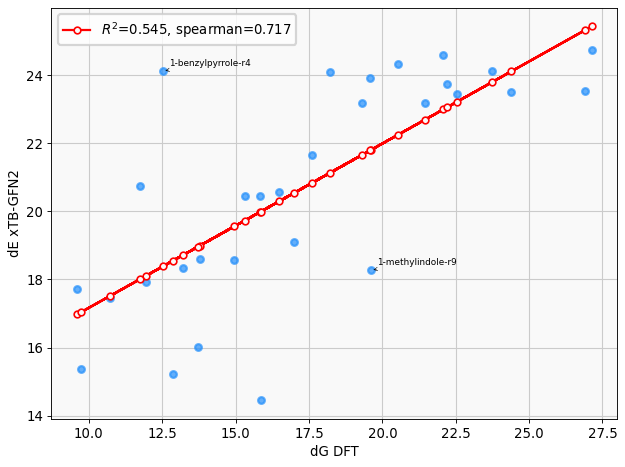

In [16]:
vis.plot_regression_outliers(df_final, size=(8, 6))

In [17]:
df_final.to_csv("misc/int_dG_dE_final.csv")